## Group: 
#### Adriana Abella – 170346000
#### Shivani Mehan – 160301480

## Abstract

This project was created for our CP321 - Data Visualization course. It explores the wage gap and gender discrimination in Canada through 3 different visualizations. It was submitted on April 12th, 2020.


## Section 1. Introduction and Motivation

   As two women in STEM, we have both experienced firsthand the gender disparity prevalent in the tech world. From condescending group members, to being in classes full of all boys, being a girl in computer science isn't always fun. However, this discrimination and sexism isn't exclusive to just the field of computer science. These are symptoms of a broader problem in our society and are issues that affect the majority of women in the world - regardless of the industry they work in. 

   That's why, when looking for a dataset for this project, we were drawn to one found in Canada's open database titled "Average and median gender pay ratio in annual wages, salaries, and commissions." It's a dataset that compares wages and compensation based on gender. 
   
   Sexism is often brushed off by society, and the wage gap to this day is still considered a 'debatable' topic, with people going so far as to even question its existence. Therefore the main question we are trying to answer with this project is: How severe is the wage gap in Canada? Is it bad, or is it not a big deal? Is it dependent on the industry, or widespread?
   
   We hope that through answering these questions we can gain a better understanding of the problems that women still face to this very day, and highlight where change can be made.

## Section 2. Data Set Description, Statistics, and Processing

   The dataset was retrieved from https://open.canada.ca/data/en/dataset/e15f2c98-b09a-4713-b957-aa440dc0f026. It's titled "Average and median gender pay ratio in annual wages, salaries, and commissions." The objective of this dataset is to track the earnings of Canadians and compare them based on gender. Earnings in terms of this dataset refer to yearly total compensation, including wages, salaries, and commissions.
   
   The dataset covers from the years 2012 - 2018 and categorizes records into their appropriate industry using the National Occupational Classification (NOC). There is a total of 16 columns in the dataset, with the most important ones being: REF_DATE (the year), GEO (the province), National Occupational Classification (the industry), Statistics (specifies which stat is being measured for which gender), and Value (provides the value for the specified stat). The remaining columns are for maintenance and quality control of the dataset. 
   
   In terms of preprocessing, the dataset is fairly clean and well organized. There were no null values to have to account for, and every record was well filled out. The only thing that had to be done was add rows for missing territories and provinces that had no data given. If a province/territory didn't have information for a certain statistic, we initialized it to zero. This was done for the last visualization, which is a choropleth map.

## Section 3. Visualization

There are three visualizations included in this project. Each one visualizes a different aspect of the dataset and provides distinct insights.

The first visualization is one that charts the total difference in average female and male income in Canada in all occupations from 2012 - 2018. This is a visualization that shows the general summary of the dataset. We chose to do it as a line graph because a line graph highlights the difference very well. There is no intersection between the lines representing male income and female income, and male income is very consistently higher than female's income.

The second visualization is one that charts the difference of income in each industry. It covers the year 2018, and we chose to show this visualization in a grouped bar chart in order to efficiently show the difference between average male income and female income. As can be seen in the bar chart, the average male income surpasses average female income every time.

The third and last visualization is a choropleth map of Canada. This visualization shows the differences in male income and female income per province/territory. There was no data available for the territories so, as mentioned above, they were initialized to zero.

### Visualization #1: Line Graph

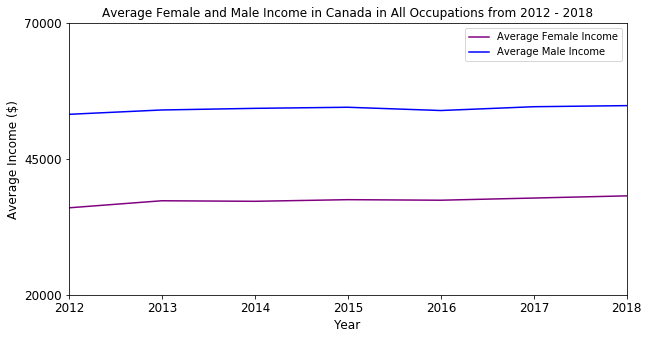

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Get information
df = pd.read_csv('data/incomeearnings.csv')[['REF_DATE','Statistics', 'GEO', 'National Occupational Classification (NOC)', 'VALUE']]

#Rename Date
df.rename(columns = {'REF_DATE':'Date'}, inplace = True)

#Extract specific data for female income
df_average_females = df[(df['Statistics'] == 'Average employment income, females') & (df['GEO'] == 'Canada') & (df['National Occupational Classification (NOC)'] == 'All occupations')]
df_average_females = (df_average_females[['Date','VALUE']])

#Rename Female Income Values
df_average_females.rename(columns = {'VALUE':'Average Female Income'}, inplace = True)

#Extract specific data for male income
df_average_males = df[(df['Statistics'] == 'Average employment income, males') & (df['GEO'] == 'Canada') & (df['National Occupational Classification (NOC)'] == 'All occupations')]
df_average_males = (df_average_males[['VALUE']])

#Rename Female Income Values
df_average_males.rename(columns = {'VALUE':'Average Male Income'}, inplace = True)

#Reset indexes and merge dataframes 
df_average_females = df_average_females.reset_index(drop=True)
df_average_males = df_average_males.reset_index(drop=True)
df_averages = pd.concat([df_average_females, df_average_males], axis=1)
df_averages.set_index('Date', inplace=True)

#Plot 
ax = df_averages[['Average Female Income','Average Male Income']].plot(title ="Average Female and Male Income in Canada in All Occupations from 2012 - 2018", figsize=(10, 5), legend=True, fontsize=12, color = ['purple', 'blue'], yticks = range(20000,90000,25000))
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Income ($)", fontsize=12)
ax.margins(x=0)

plt.show()

### Visualization #2: Grouped Bar Chart

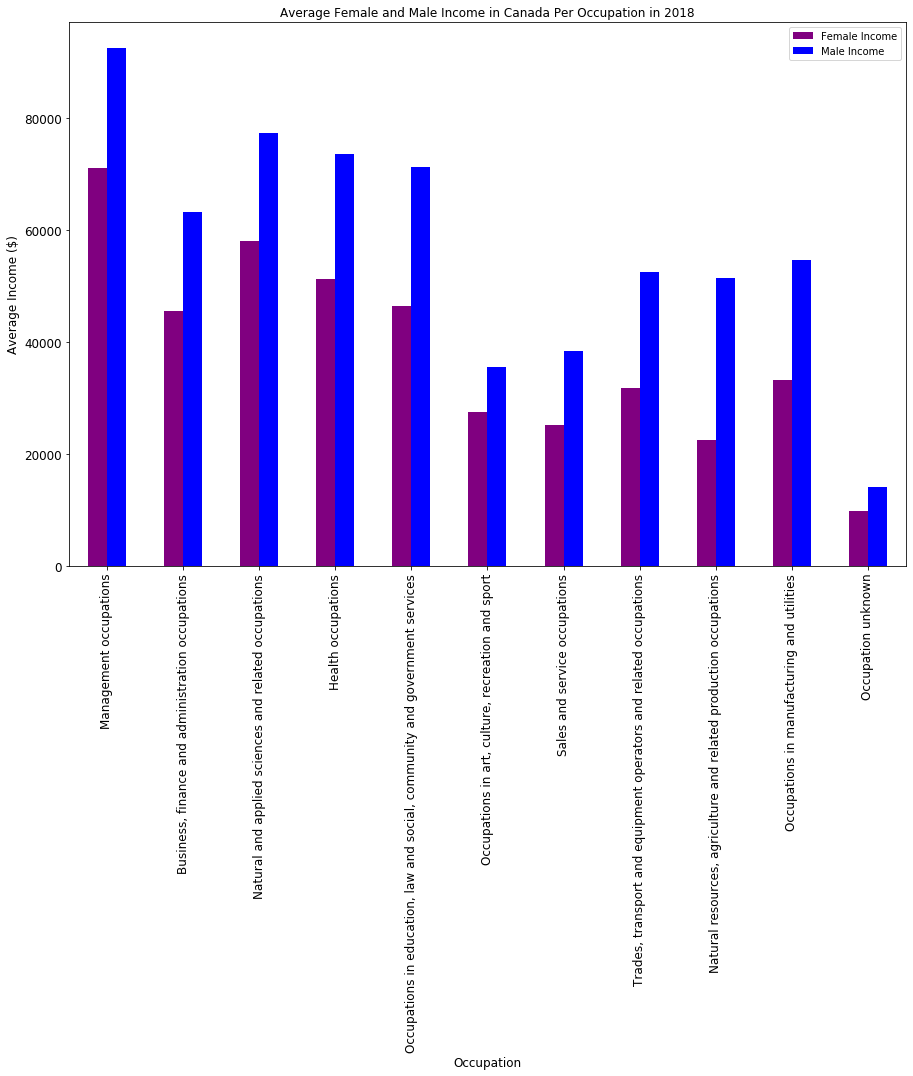

In [7]:
df_avg_f = df[(df['Statistics'] == 'Average employment income, females') & (df['GEO'] == 'Canada') & (df['Date'] == 2018) & (df['National Occupational Classification (NOC)'] != 'All occupations')]
df_avg_f.rename(columns = {'National Occupational Classification (NOC)':'Occupations'}, inplace = True)
df_avg_f = (df_avg_f[['Occupations','VALUE']])
df_avg_f.rename(columns = {'VALUE':'Female Income'}, inplace = True)

df_avg_m = df[(df['Statistics'] == 'Average employment income, males') & (df['GEO'] == 'Canada') & (df['Date'] == 2018) & (df['National Occupational Classification (NOC)'] != 'All occupations')]
df_avg_m = (df_avg_m[['VALUE']])
df_avg_m.rename(columns = {'VALUE':'Male Income'}, inplace = True)

df_avg_f = df_avg_f.reset_index(drop=True)
df_avg_m = df_avg_m.reset_index(drop=True)
df_occupations = pd.concat([df_avg_f, df_avg_m], axis=1)
df_occupations.set_index('Occupations', inplace=True)

ax = df_occupations[['Female Income','Male Income']].plot(kind='bar', title ="Average Female and Male Income in Canada Per Occupation in 2018", figsize=(15, 10), legend=True, fontsize=12, color = ['purple', 'blue'])
ax.set_xlabel("Occupation", fontsize=12)
ax.set_ylabel("Average Income ($)", fontsize=12)
plt.show()

### Visualization #3: Choropleth Map

In [3]:
import pandas as pd
import geopandas as gpd
import json

shapefile = 'data/canada/canadaprovinces.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['PRENAME', 'PREABBR', 'geometry']]

#Rename columns.
gdf.columns = ['province', 'province_code', 'geometry']

df_average_female = df[(df['Statistics'] == 'Average employment income, females') & (~df['GEO'].str.contains('Canada')) & (~df['GEO'].str.contains('provinces')) & (df['National Occupational Classification (NOC)'] == 'All occupations')]
df_average_female = (df_average_female[['Date','GEO', 'VALUE']])

df_average = df[(df['Statistics'] == 'Average employment income, males') & (~df['GEO'].str.contains('Canada')) & (~df['GEO'].str.contains('provinces')) & (df['National Occupational Classification (NOC)'] == 'All occupations')]
df_average = (df_average[['Date','GEO', 'VALUE']])

#Calculate the difference 
df_average['VALUE'].subtract(df_average_female['VALUE'])  

#Filter data for year 2018.
df_2018 = df_average[(df_average['Date'] == 2018)]

#Add the missing provinces/territories
rows = pd.DataFrame({'Date':[2018, 2018, 2018], 'GEO': ['Nunavut', 'Yukon', 'Northwest Territories'], 'VALUE': [0,0,0]})
df_2018 = pd.concat([rows, df_2018], ignore_index=True)

#Merge dataframennms gdf and df_2018,
merged = gdf.merge(df_2018, left_on = 'province', right_on = 'GEO')
merged

,province,province_code,geometry,Date,GEO,VALUE
0,Newfoundland and Labrador,N.L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",2018,Newfoundland and Labrador,54000.0
1,Prince Edward Island,P.E.I.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",2018,Prince Edward Island,41200.0
2,Nova Scotia,N.S.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",2018,Nova Scotia,48200.0
3,New Brunswick,N.B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",2018,New Brunswick,47200.0
4,Quebec,Que.,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",2018,Quebec,48000.0
5,Ontario,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",2018,Ontario,55900.0
6,Manitoba,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",2018,Manitoba,52500.0
7,Saskatchewan,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640...",2018,Saskatchewan,55100.0
8,Alberta,Alta.,"POLYGON ((5228304.177 2767597.891, 5228098.463...",2018,Alberta,66700.0
9,British Columbia,B.C.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",2018,British Columbia,55200.0


Text(0.5, 1, 'The Difference of the Average Male to Female Income in All Occupations per Canadian Province in 2018')

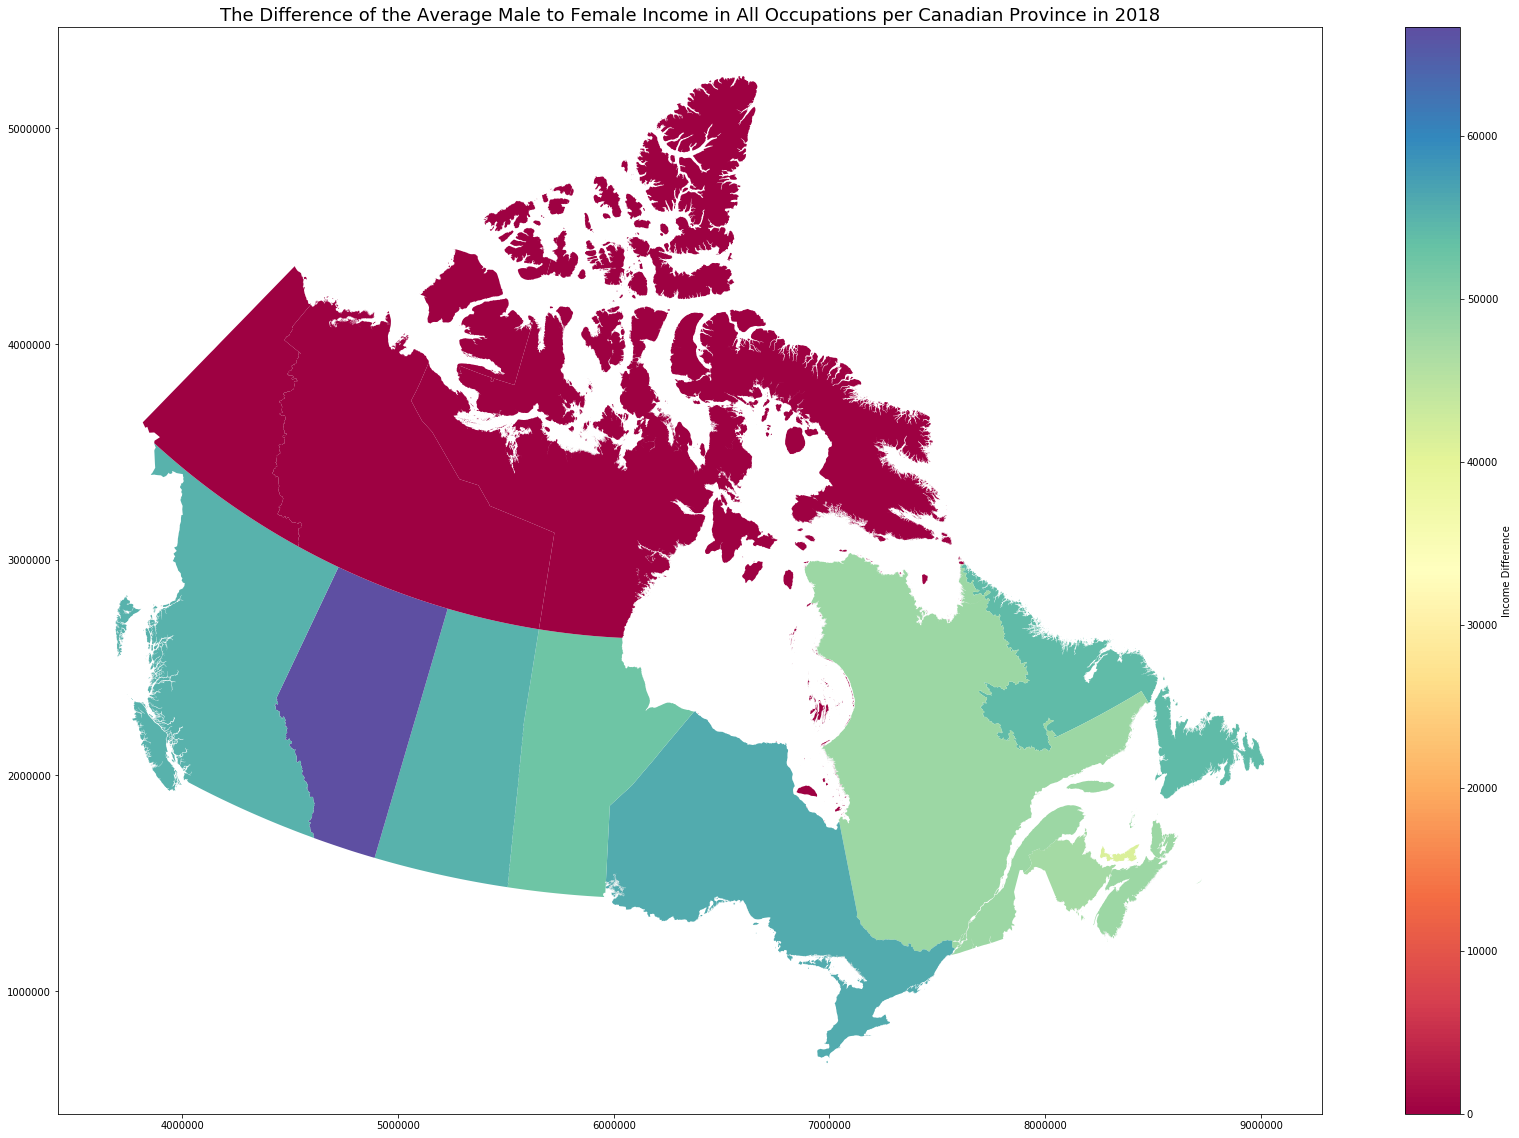

In [4]:
merged.set_geometry('geometry')
ax2 = merged.plot(column='VALUE',figsize=(30,20), legend = True, legend_kwds={'label': "Income Difference"}, cmap = 'Spectral')
ax2.set_title('The Difference of the Average Male to Female Income in All Occupations per Canadian Province in 2018', fontsize = 18)

## Section 4. Conclusion

In conclusion, the visualizations we provided very accurately sum up the wage gap issue in Canada. In every single visualization and interpretation of the data, it was clear that males earn significantly more than females - regardless of the year, industry, or province. 

It's clear from this project that Canada is still facing sexism and income discrimination. As women in STEM, the results from each visualization were upsetting but not surprising. Women have been facing these problems for quite a bit of time, and while we have come far there is still further to go. This project to us was a confirmation of something that we as women already knew, but we hope that the power of data visualization can help enact social change and open the eyes of others who may be unaware of the reality of things.